In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("student_scores.csv")
print(" Checking for missing values:")
print(df.isnull())

#print("Validating range (0-100):")
#invalid = df.loc[:, "Maths":] > 100
#print(df[invalid.any(axis=1)])

 Checking for missing values:
   Student  Maths  Science  English    SST
0    False  False    False    False  False
1    False  False    False    False  False
2    False  False    False    False  False
3    False  False    False    False  False
4    False  False    False    False  False
5    False  False    False    False  False
6    False  False    False    False  False
7    False  False    False    False  False
8    False  False    False    False  False
9    False  False    False    False  False


In [18]:
print("Mean per subject:")
print(df.loc[:, "Maths":].mean())

print("Median per subject:")
print(df.loc[:, "Maths":].median())

print("Mode per subject:")
print(df.loc[:, "Maths":].mode().iloc[0])

print("Standard Deviation per subject:")
print(df.loc[:, "Maths":].std())

print("Variance per subject:")
print(df.loc[:, "Maths":].var())

Mean per subject:
Maths      67.0
Science    70.0
English    69.0
SST        69.0
dtype: float64
Median per subject:
Maths      66.0
Science    68.5
English    67.0
SST        67.0
dtype: float64
Mode per subject:
Maths      45.0
Science    48.0
English    67.0
SST        47.0
Name: 0, dtype: float64
Standard Deviation per subject:
Maths      16.706619
Science    15.448840
English    13.976170
SST        15.092309
dtype: float64
Variance per subject:
Maths      279.111111
Science    238.666667
English    195.333333
SST        227.777778
dtype: float64


In [19]:
# Subject with highest and lowest average
subject_means = df.loc[:, "Maths":].mean()
print(f"Most Scoring Subject: {subject_means.idxmax()} ({subject_means.max():.2f})")
print(f"Least Scoring Subject: {subject_means.idxmin()} ({subject_means.min():.2f})")

Most Scoring Subject: Science (70.00)
Least Scoring Subject: Maths (67.00)


In [20]:
df["Total"] = df.loc[:, "Maths":].sum(axis=1)
df["Average"] = df["Total"] / 4

# Performance Categories
def categorize(avg):
    if avg >= 85:
        return "Excellent"
    elif avg >= 70:
        return "Good"
    elif avg >= 50:
        return "Average"
    else:
        return "Needs Improvement"

df["Category"] = df["Average"].apply(categorize)

print("Student Performance Categories:")
print(df[["Student", "Total", "Average", "Category"]])

Student Performance Categories:
  Student  Total  Average           Category
0    Amit    304    76.00               Good
1    Riya    241    60.25            Average
2   Sohan    363    90.75          Excellent
3    Neha    196    49.00  Needs Improvement
4   Rahul    276    69.00            Average
5  Anjali    243    60.75            Average
6    Ravi    359    89.75          Excellent
7   Priya    264    66.00            Average
8   Rohan    313    78.25               Good
9   Meena    191    47.75  Needs Improvement


In [21]:
print("Subject-wise Toppers:")
for subject in ["Maths", "Science", "English", "SST"]:
    top_score = df[subject].max()
    topper = df[df[subject] == top_score]["Student"].values
    print(f"{subject}: {', '.join(topper)} ({top_score})")

Subject-wise Toppers:
Maths: Sohan, Ravi (90)
Science: Sohan (91)
English: Ravi (91)
SST: Sohan (93)


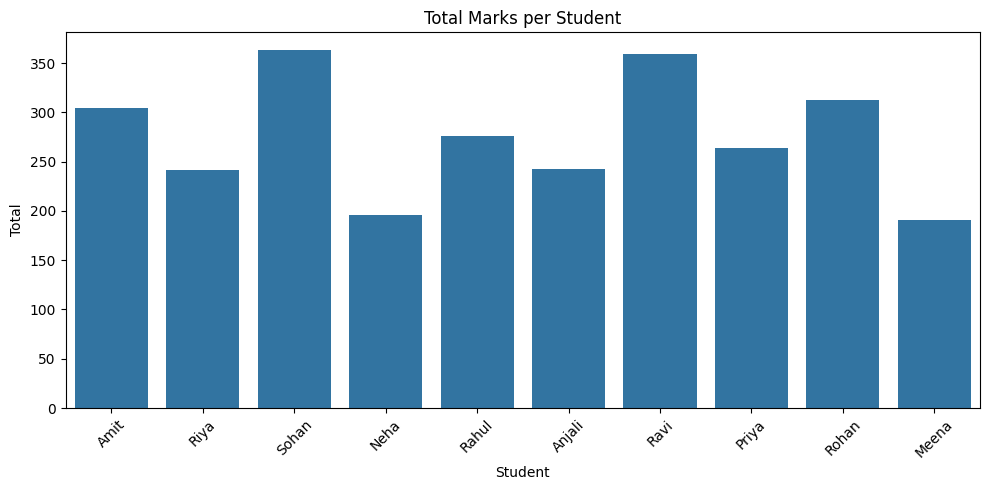

In [25]:
# Bar Chart: Total marks of each student
plt.figure(figsize=(10, 5))
sns.barplot(x="Student", y="Total", data=df)
plt.title("Total Marks per Student")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

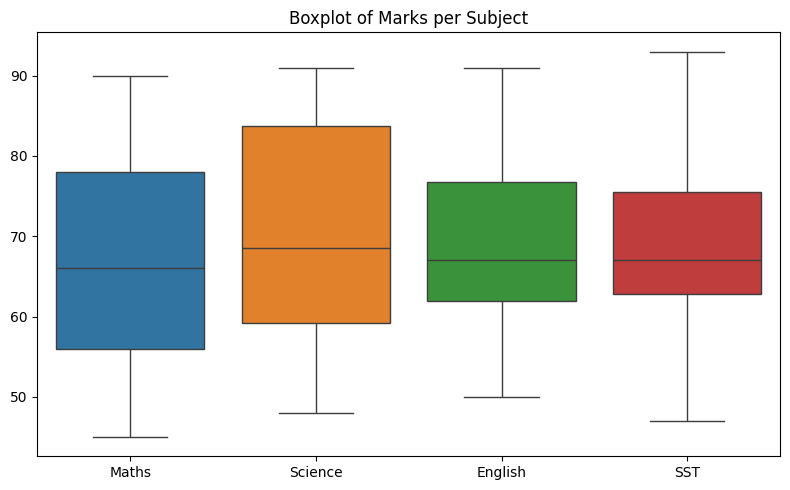

In [23]:
# Boxplot: Spread of marks per subject
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.loc[:, "Maths":"SST"])
plt.title("Boxplot of Marks per Subject")
plt.tight_layout()
plt.show()

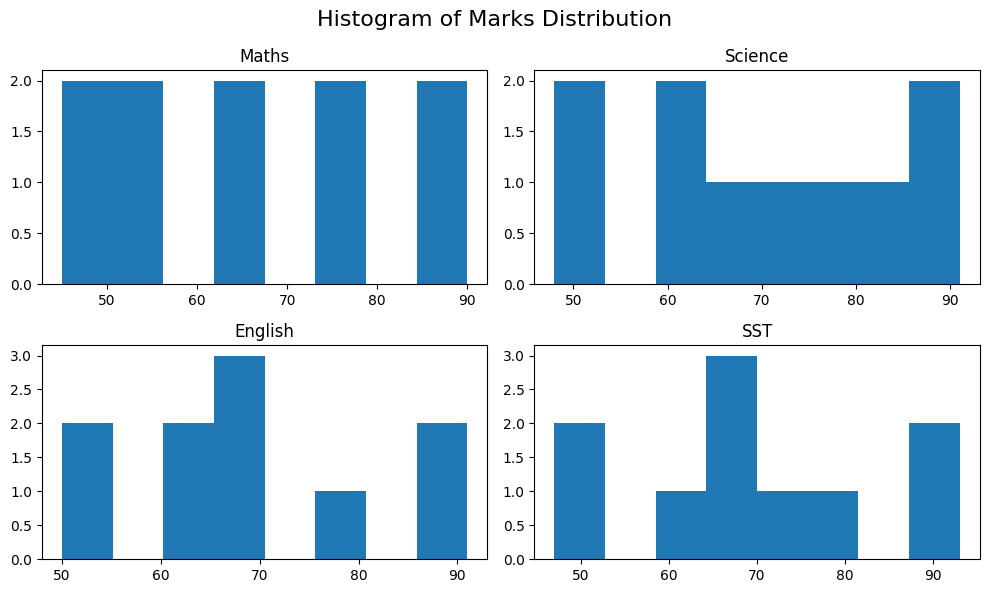

In [24]:
# Histogram: Frequency distribution of each subject
df.loc[:, "Maths":"SST"].hist(bins=8, figsize=(10, 6), grid=False)
plt.suptitle("Histogram of Marks Distribution", fontsize=16)
plt.tight_layout()
plt.show()